In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing dataset**

In [3]:
df=pd.read_csv("/content/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical features:
- sex
- smoker
- region

In [6]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


There are no null values in the data

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Distribution of features

/tmp/ipython-input-1631283782.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


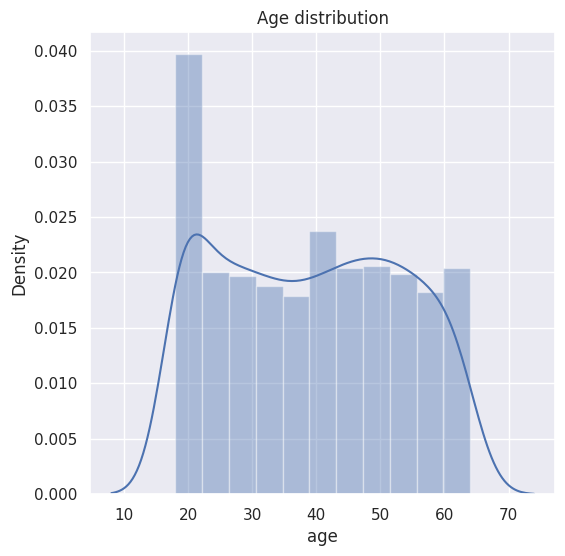

In [8]:
sns.set()
plt.figure(figsize=(6,6))
plt.title('Age distribution')
sns.distplot(df['age'])
plt.show()

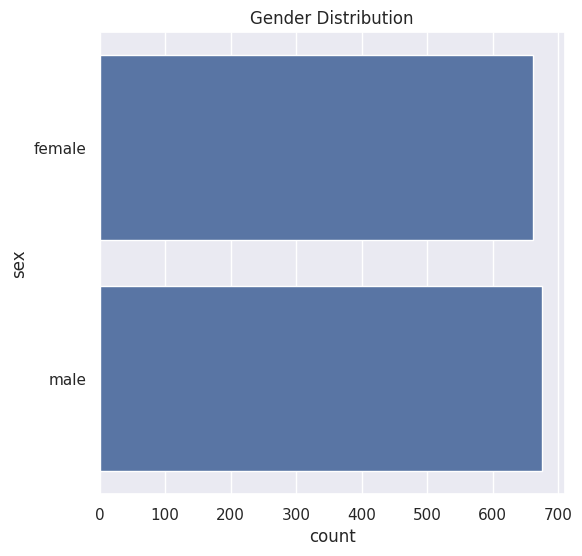

In [9]:
plt.figure(figsize=(6,6))
sns.countplot(df['sex'])
plt.title("Gender Distribution")
plt.show()

/tmp/ipython-input-2772798317.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


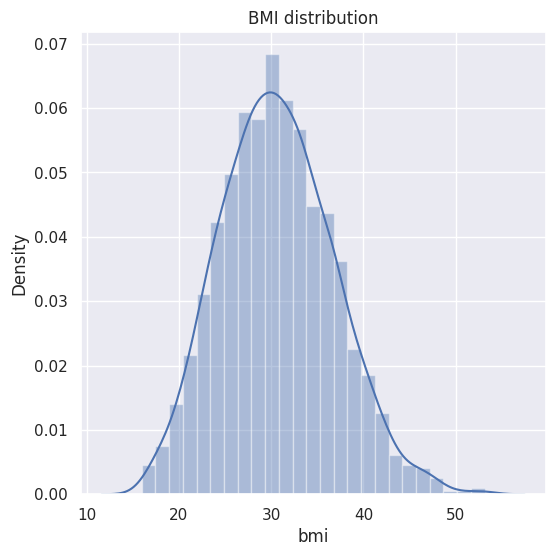

In [10]:
plt.figure(figsize=(6,6))
plt.title('BMI distribution')
sns.distplot(df['bmi'])
plt.show()

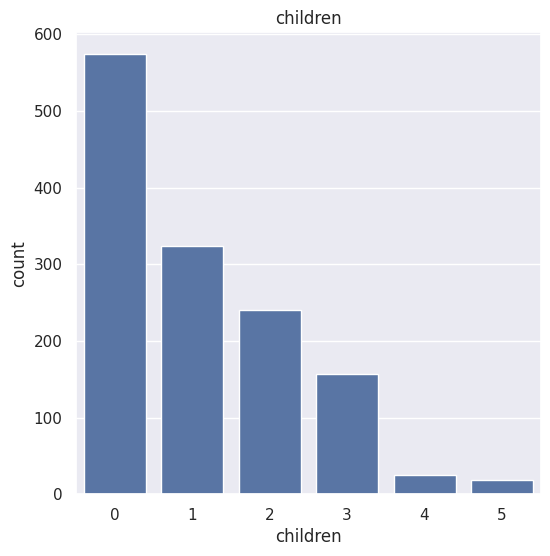

In [11]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=df)
plt.title("children")
plt.show()

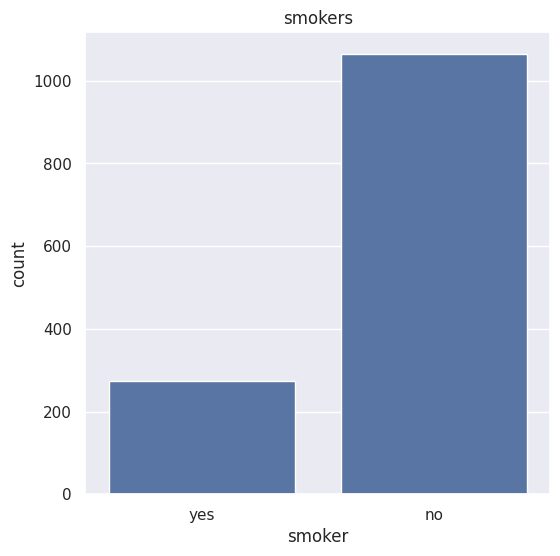

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=df)
plt.title("smokers")
plt.show()

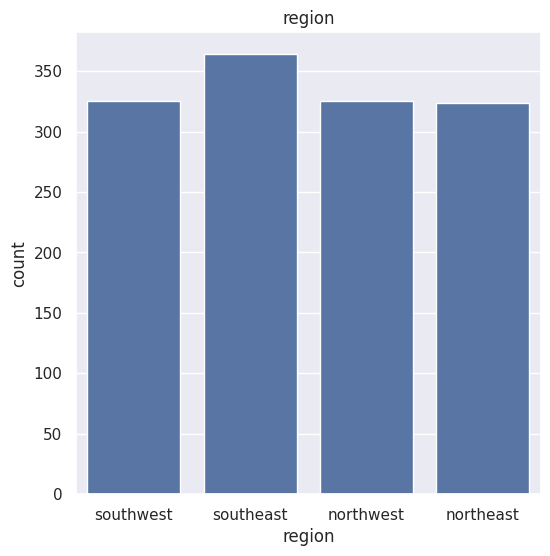

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [13]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=df)
plt.title("region")
plt.show()
df['region'].value_counts()

/tmp/ipython-input-4187200405.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


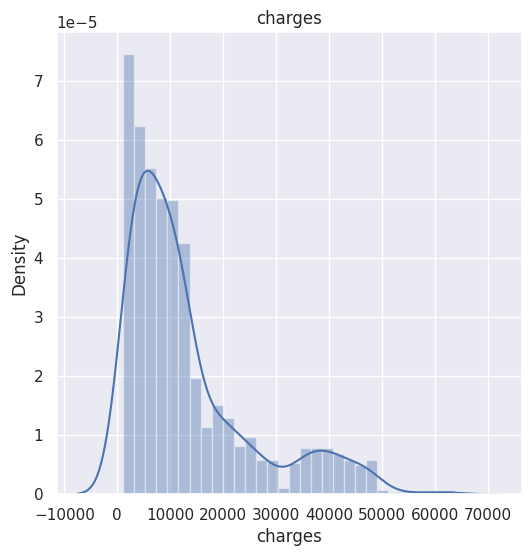

In [14]:
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title("charges")
plt.show()

**Data preprocessing**

converting the categorical data into integers

In [15]:
df.replace({'sex':{'male':1,'female':0}},inplace=True)

/tmp/ipython-input-2958280475.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex':{'male':1,'female':0}},inplace=True)


In [16]:
df.replace({'smoker':{'yes':1,'no':0}},inplace=True)

/tmp/ipython-input-1862471365.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker':{'yes':1,'no':0}},inplace=True)


In [17]:
df.replace({'southwest':0,'southeast':1,'northwest':2,'northeast':3},inplace=True)

/tmp/ipython-input-3172399082.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'southwest':0,'southeast':1,'northwest':2,'northeast':3},inplace=True)


data after preprocessing

In [18]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
5,31,0,25.740,0,0,1,3756.62160
6,46,0,33.440,1,0,1,8240.58960
7,37,0,27.740,3,0,2,7281.50560
8,37,1,29.830,2,0,3,6406.41070
9,60,0,25.840,0,0,2,28923.13692


Separating Features and target

In [19]:
X=df.drop(columns='charges',axis=1)
Y=df['charges']
print(X)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       0
1      18    1  33.770         1       0       1
2      28    1  33.000         3       0       1
3      33    1  22.705         0       0       2
4      32    1  28.880         0       0       2
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       2
1334   18    0  31.920         0       0       3
1335   18    0  36.850         0       0       1
1336   21    0  25.800         0       0       0
1337   61    0  29.070         0       1       2

[1338 rows x 6 columns]
